In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import pandas as pd
import sys
sys.path.append('/home/ws/oc9627/cerebral_organoid_quant_mri')

from scripts.utils.constants import MRI_ORG_LOC_GT_DIR, MRI_CYST_LOC_GT_DIR
from scripts.utils.SegmentationPerformanceExtractor import SegmentationPerformanceExtractor
from scripts.utils.SegmentationOverlayVisualizer import SegmentationOverlayVisualizer
from scripts.utils.io_utils import get_orig_imgs, get_masks
from scripts.utils.global_cyst_classification import get_compactness
from scripts.utils.metrics import calculate_roc_auc
from scripts.utils.dwmri import get_metrics_global_cyst_seg_dw_mri

from scripts.utils.visualization import plot_compactness, plot_examples_lq_hq_organoids, plot_trace_lq_hq_mean_org_int, plot_correlation_compactness_cysticity

wdir = '/home/ws/oc9627/cerebral_organoid_quant_mri'
os.chdir(wdir)

# Organoid segmentation

#### extract results on test set

In [2]:
pred_dir = 'results/organoid_segmentation/checkpoint_files_3DUNet_run1/all_predictions_on_test_sets'
gt_dir = MRI_ORG_LOC_GT_DIR

Test Dice 0.92±0.06 (mean±SD)


/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = self.df.drop_duplicates().mean()['Test Dice']
/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sd = self.df.drop_duplicates().std()['Test Dice']


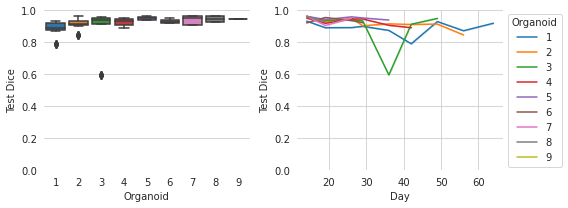

In [13]:
spe = SegmentationPerformanceExtractor(pred_dir = pred_dir,
                                       gt_dir = gt_dir)
spe.extract_test_performance()
spe.plot_test_performance(save_to='results/organoid_segmentation/plots/organoid_seg_performance.png')
spe.print_test_dice_mean_sd()

### run 2

Test Dice 0.89±0.09 (mean±SD)


/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = self.df.drop_duplicates().mean()['Test Dice']
/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sd = self.df.drop_duplicates().std()['Test Dice']


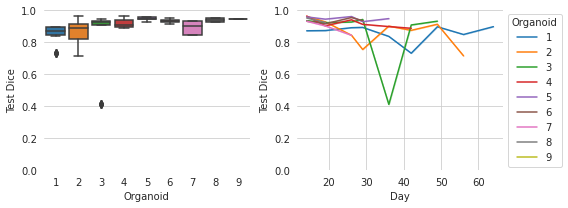

In [14]:
pred_dir = 'results/organoid_segmentation/checkpoint_dirs/all_predictions_on_test_sets'
gt_dir = MRI_ORG_LOC_GT_DIR

spe = SegmentationPerformanceExtractor(pred_dir = pred_dir,
                                       gt_dir = gt_dir)
spe.extract_test_performance()
spe.plot_test_performance()
spe.print_test_dice_mean_sd()

#### plot weakest, intermediate and best prediction

In [4]:
imgs = get_orig_imgs(kind='mri')

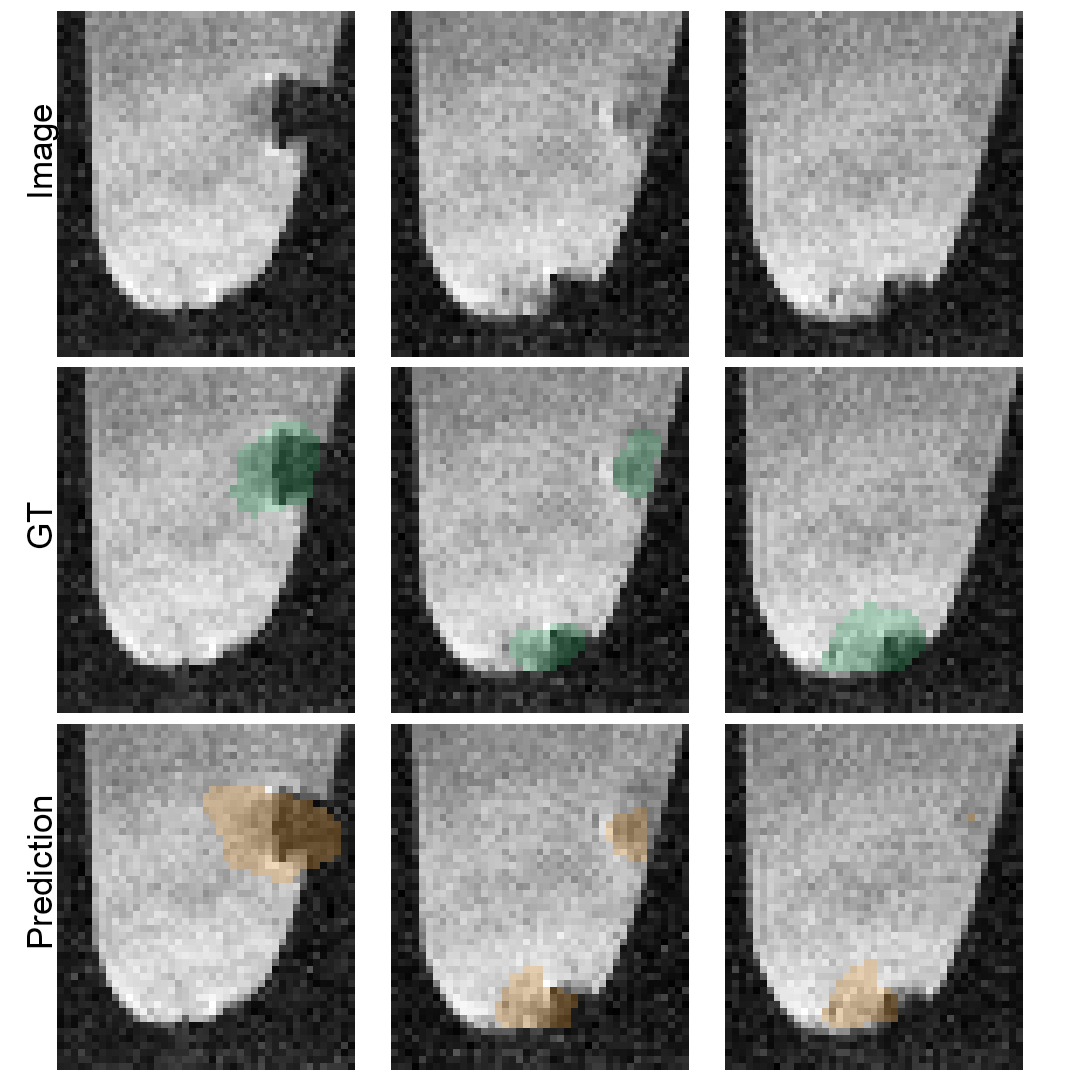

In [20]:
# weakest prediction
for pred_color in ['green', 'orange']:
    sov = SegmentationOverlayVisualizer(imgs,
                                    org_id = 'org3_0609', 
                                    org_loc = [15, 65, 65, 108], 
                                    gt_dir = MRI_ORG_LOC_GT_DIR,
                                    pred_dir = pred_dir,
                                    px_threshold=0,
                                    planes='sagittal',
                                    keep_planes=[44, 47, 50],
                                    rot_img=270,
                                    pred_color=pred_color,
                                    save_to=f'results/organoid_segmentation/plots/organoid_seg_overlay_org3_0609_pred-{pred_color}.png')
    sov.plot_segmentation_overlays()
display(sov.plot_segmentation_overlays())

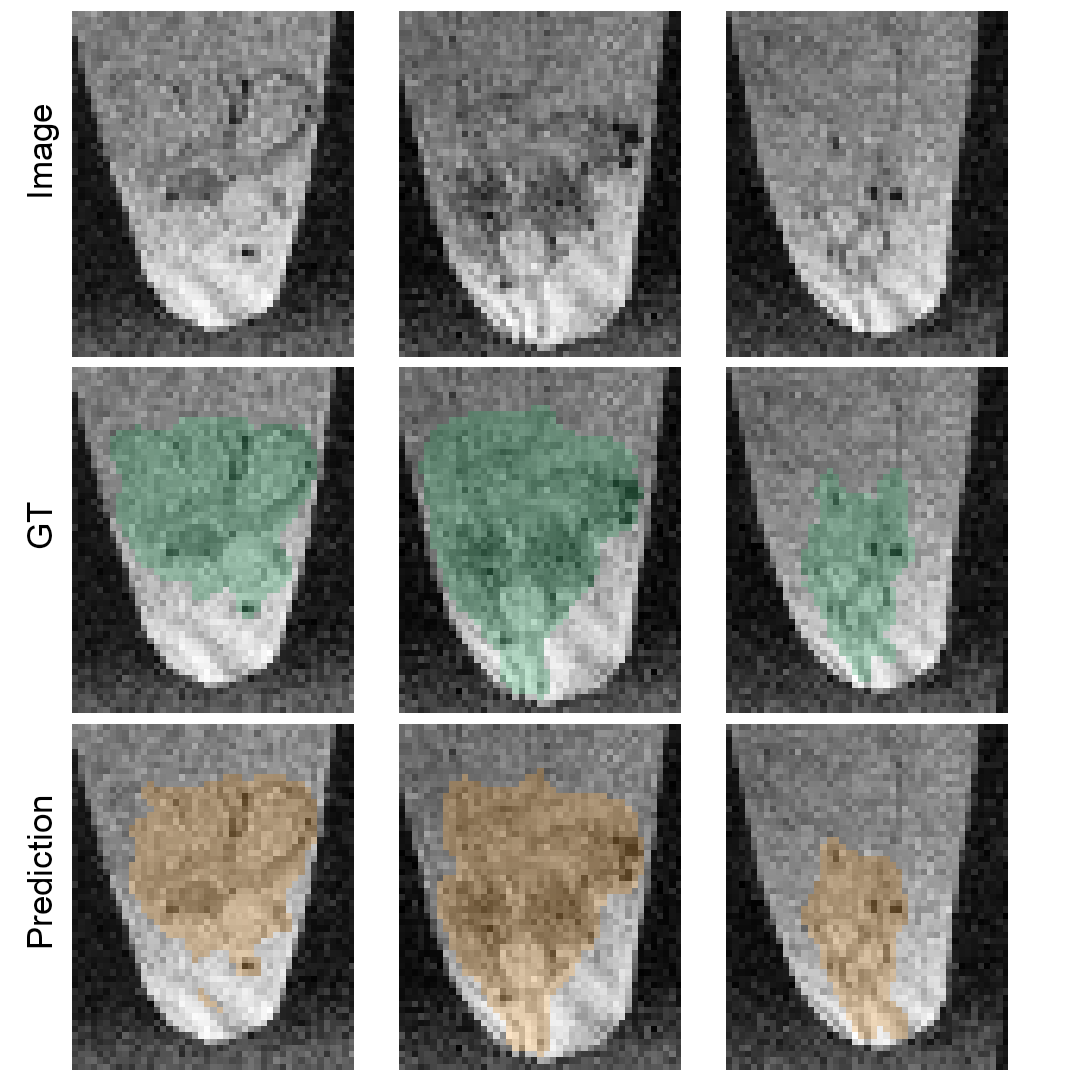

In [11]:
# intermediate prediction
for pred_color in ['green', 'orange']:
    sov = SegmentationOverlayVisualizer(imgs,
                                 org_id = 'org2_0615', 
                                 org_loc = [20, 75, 30, 75], 
                                 gt_dir = MRI_ORG_LOC_GT_DIR,
                                 pred_dir = pred_dir,
                                 px_threshold=0,
                                 planes='sagittal',
                                 keep_planes=[40, 50, 58],
                                 rot_img=270,
                                 pred_color=pred_color,
                                 save_to=f'results/organoid_segmentation/plots/organoid_seg_overlay_org2_0615_pred-{pred_color}.png')
    sov.plot_segmentation_overlays()
display(sov.plot_segmentation_overlays())

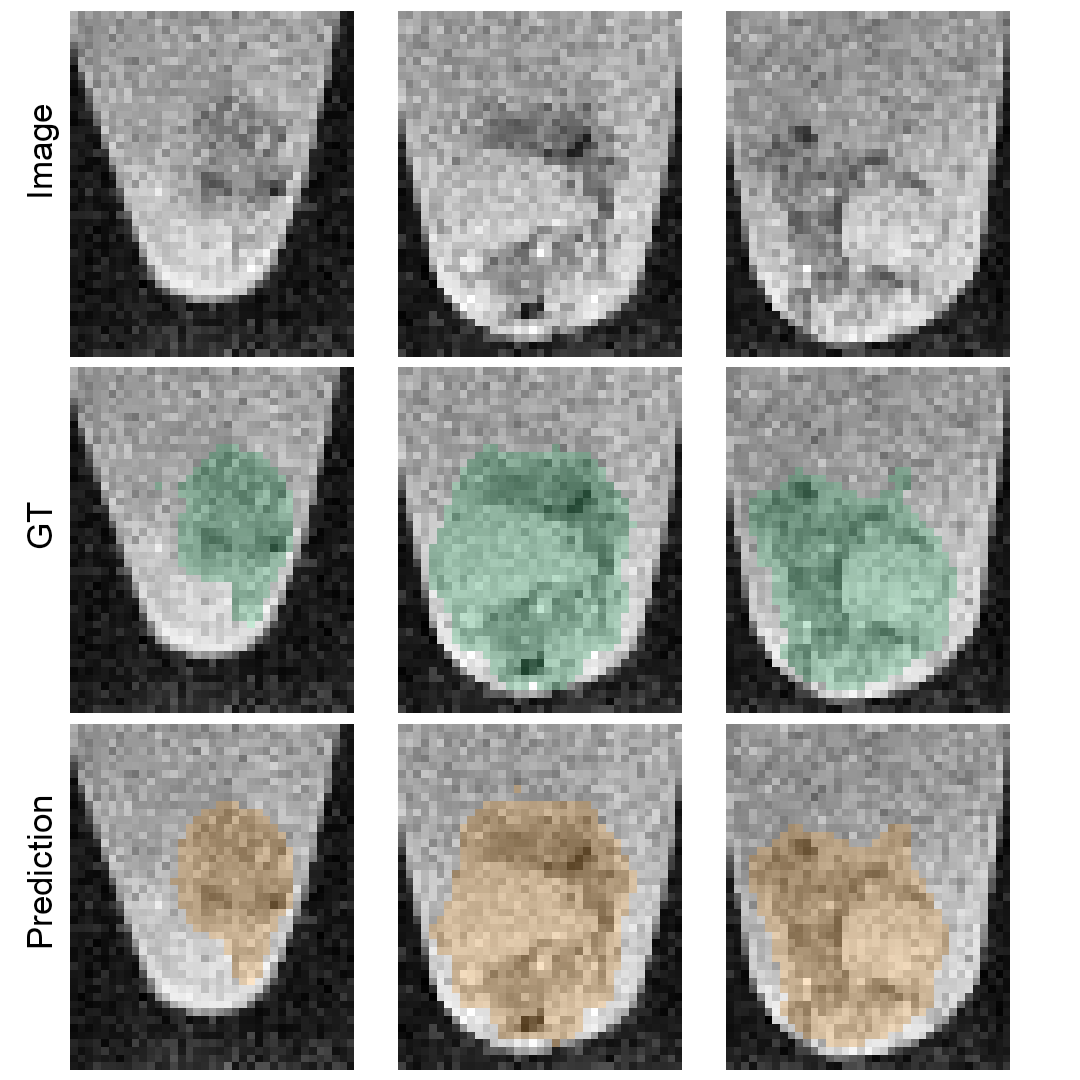

In [6]:
# strongest prediction
for pred_color in ['green', 'orange']:
    sov = SegmentationOverlayVisualizer(imgs,
                                     org_id = 'org5_0530', 
                                     org_loc = [20, 65, 38, 75], 
                                     gt_dir = MRI_ORG_LOC_GT_DIR,
                                     pred_dir = pred_dir,
                                     px_threshold=0,
                                     planes='sagittal',
                                     keep_planes=[34, 40, 52],
                                     rot_img=270,
                                     pred_color=pred_color,
                                     save_to=f'results/organoid_segmentation/plots/organoid_seg_overlay_org5_0530_pred-{pred_color}.png')
img = sov.plot_segmentation_overlays()
display(img)

# Global cyst classification

#### Calculate mean organoid intensities and compactness

In [2]:
df = get_compactness()

/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/global_cyst_classification.py:43: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.stack(np.array(eppendorf_masks)), 0, -1)
/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/global_cyst_classification.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.stack(np.array(eppendorf_masks)), 0, -1)


#### Calculate ROC AUC and visualize class separation

ROC AUC for mean organoid intensity:	0.64
ROC AUC for Compactness:		0.98


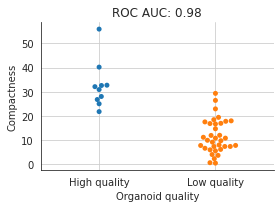

In [3]:
roc_auc_moi = calculate_roc_auc(df, col='mean_organoid_intensity')
roc_auc_compactness = calculate_roc_auc(df, col='compactness')

print(f'ROC AUC for mean organoid intensity:\t{roc_auc_moi}')
print(f'ROC AUC for Compactness:\t\t{roc_auc_compactness}')

plot_compactness(df, 
                 roc_auc_compactness, 
                 save_to='results/global_cyst_classification/compactness_separates_lq_hq_organoids.png')

#### Visualize examples of LQ and HQ organoids

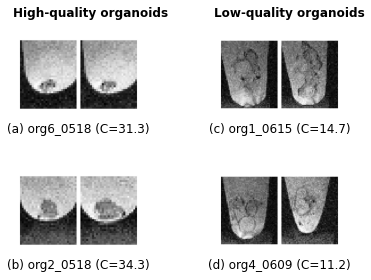

In [2]:
org_ids = ['org6_0518', 'org2_0518', 'org1_0615', 'org4_0609']
compactnesses = [31.3, 34.3, 14.7, 11.2]
# two selected sagittal planes for each organoid
# other ranges to crop images to EV boundaries for better visibility (manually extracted) 
org_locs_planes = [(['88-117', '59', '32-67'], ['88-117', '60', '32-67']),
                   (['40-69', '41', '40-75'], ['40-69', '45', '40-75']),
                   (['5-55', '58', '15-90'], ['5-55', '61', '15-90']),
                   (['17-67', '36', '15-85'], ['17-67', '53', '15-85'])]
plot_examples_lq_hq_organoids(org_ids, 
                              compactnesses,
                              org_locs_planes,
                              save_to='results/global_cyst_classification/examples_lq_hq_organoids.png')

#### DW-MRI to probe tissue characteristics

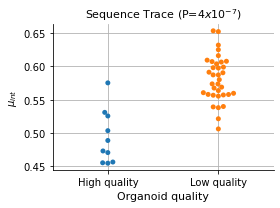

In [2]:
plot_trace_lq_hq_mean_org_int(save_to='results/global_cyst_classification/trace_mean_org_intensities.png')

# Local cyst classification

#### extract results

In [21]:
pred_dir_local_cysts = 'results/local_cyst_segmentation/checkpoint_files_3DUNet_run1/all_predictions_on_test_sets'
gt_dir = MRI_CYST_LOC_GT_DIR

Test Dice 0.63±0.15 (mean±SD)


/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = self.df.drop_duplicates().mean()['Test Dice']
/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sd = self.df.drop_duplicates().std()['Test Dice']


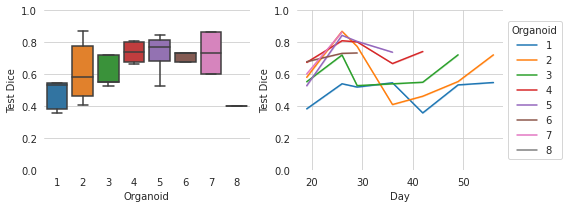

In [10]:
spe = SegmentationPerformanceExtractor(pred_dir = pred_dir_local_cysts,
                                       gt_dir = gt_dir)
spe.extract_test_performance()
spe.plot_test_performance(save_to='results/local_cyst_segmentation/plots/local_cyst_seg_performance.png')
spe.print_test_dice_mean_sd()

#### run 2

Test Dice 0.65±0.14 (mean±SD)


/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = self.df.drop_duplicates().mean()['Test Dice']
/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/SegmentationPerformanceExtractor.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sd = self.df.drop_duplicates().std()['Test Dice']


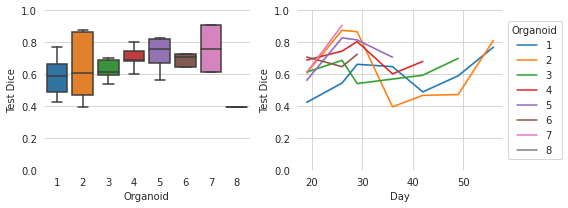

In [14]:
pred_dir_local_cysts = 'results/local_cyst_segmentation/checkpoint_dirs/all_predictions_on_test_sets'
gt_dir = MRI_CYST_LOC_GT_DIR
spe = SegmentationPerformanceExtractor(pred_dir = pred_dir_local_cysts,
                                       gt_dir = gt_dir)
spe.extract_test_performance()
spe.plot_test_performance()
spe.print_test_dice_mean_sd()

#### visualize weakest, intermediate and strongest prediction

In [22]:
imgs = get_orig_imgs(kind='mri')

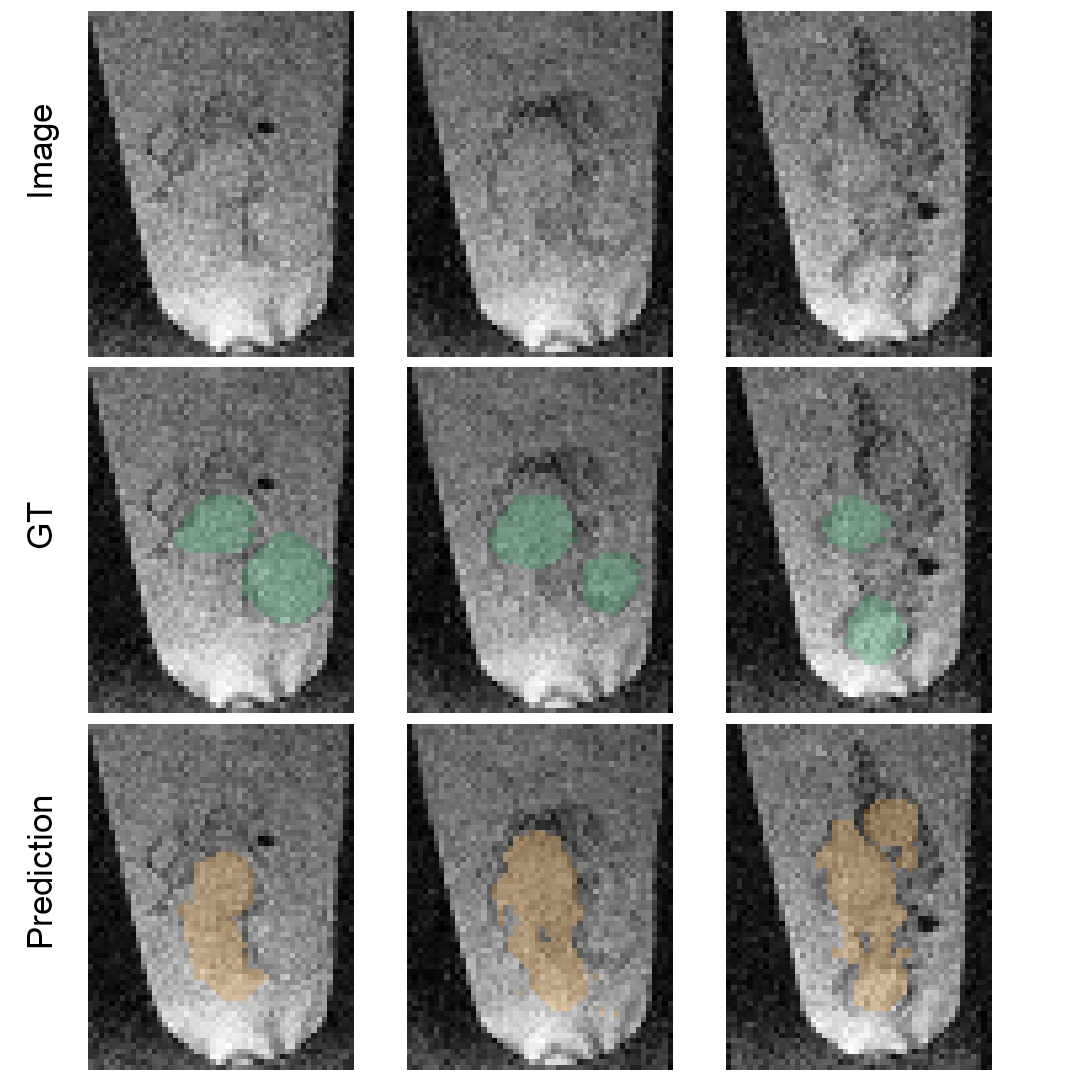

In [23]:
# weakest prediction
sov = SegmentationOverlayVisualizer(imgs,
                 org_id = 'org1_0615', 
                 org_loc = [10, 75, 10, 60],
                 gt_dir = gt_dir,
                 pred_dir = pred_dir_local_cysts,
                 planes='sagittal',
                 keep_planes=[51, 55, 60],
                 rot_img=270,
                 pred_color='orange',
                 save_to='results/local_cyst_segmentation/plots/cyst_seg_overlay_org1_0615_pred-orange.png')
display(sov.plot_segmentation_overlays())

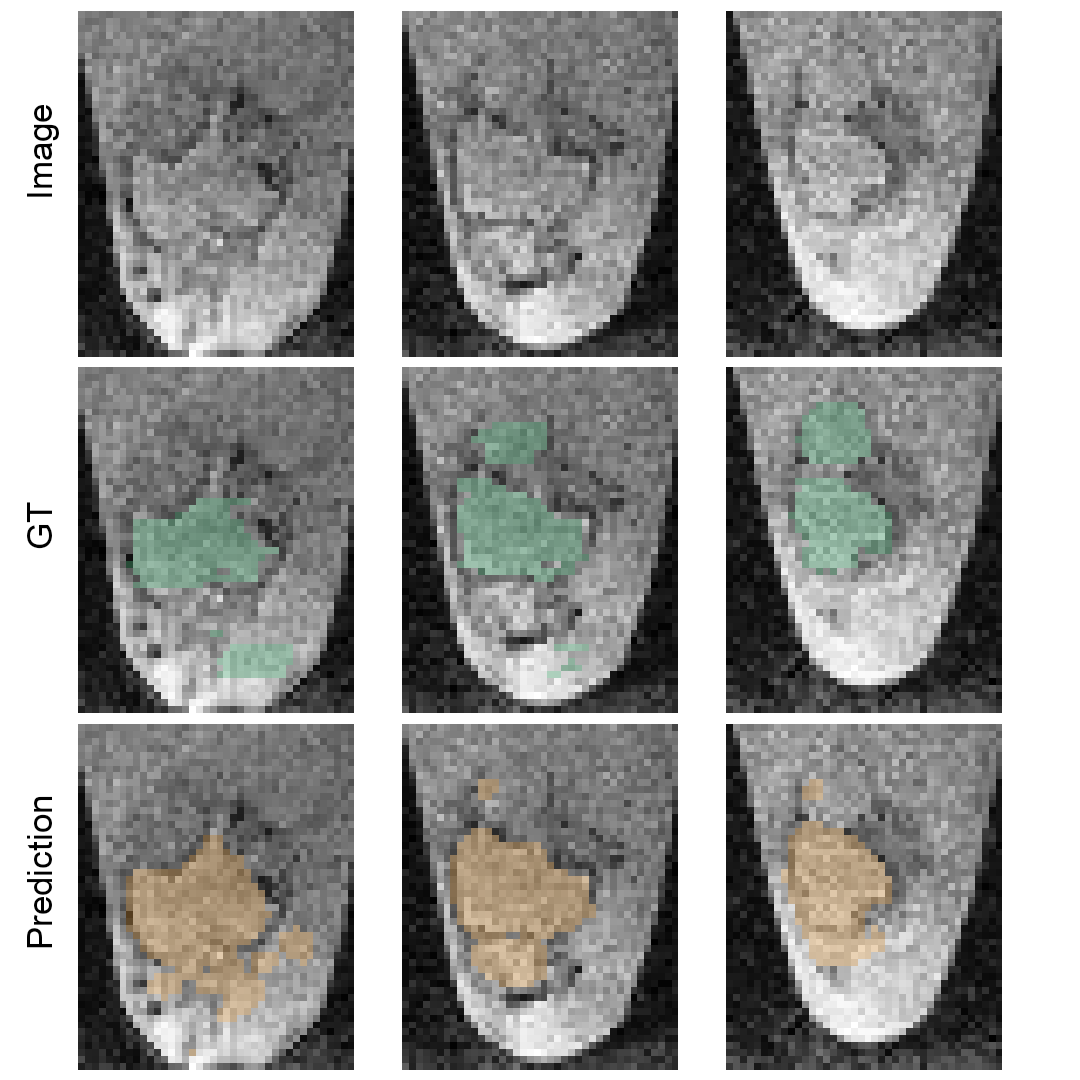

In [24]:
# intermediate prediction
sov = SegmentationOverlayVisualizer(imgs,
                 org_id = 'org4_0609', 
                 org_loc=[20, 70, 25, 65], 
                 gt_dir = gt_dir,
                 pred_dir = pred_dir_local_cysts,
                 planes='sagittal',
                 px_threshold=0,
                 keep_planes=[42, 49, 52],
                 pred_color='orange',
                 rot_img=270,
                 save_to='results/local_cyst_segmentation/plots/cyst_seg_overlay_org4_0609_pred-orange.png')
display(sov.plot_segmentation_overlays())

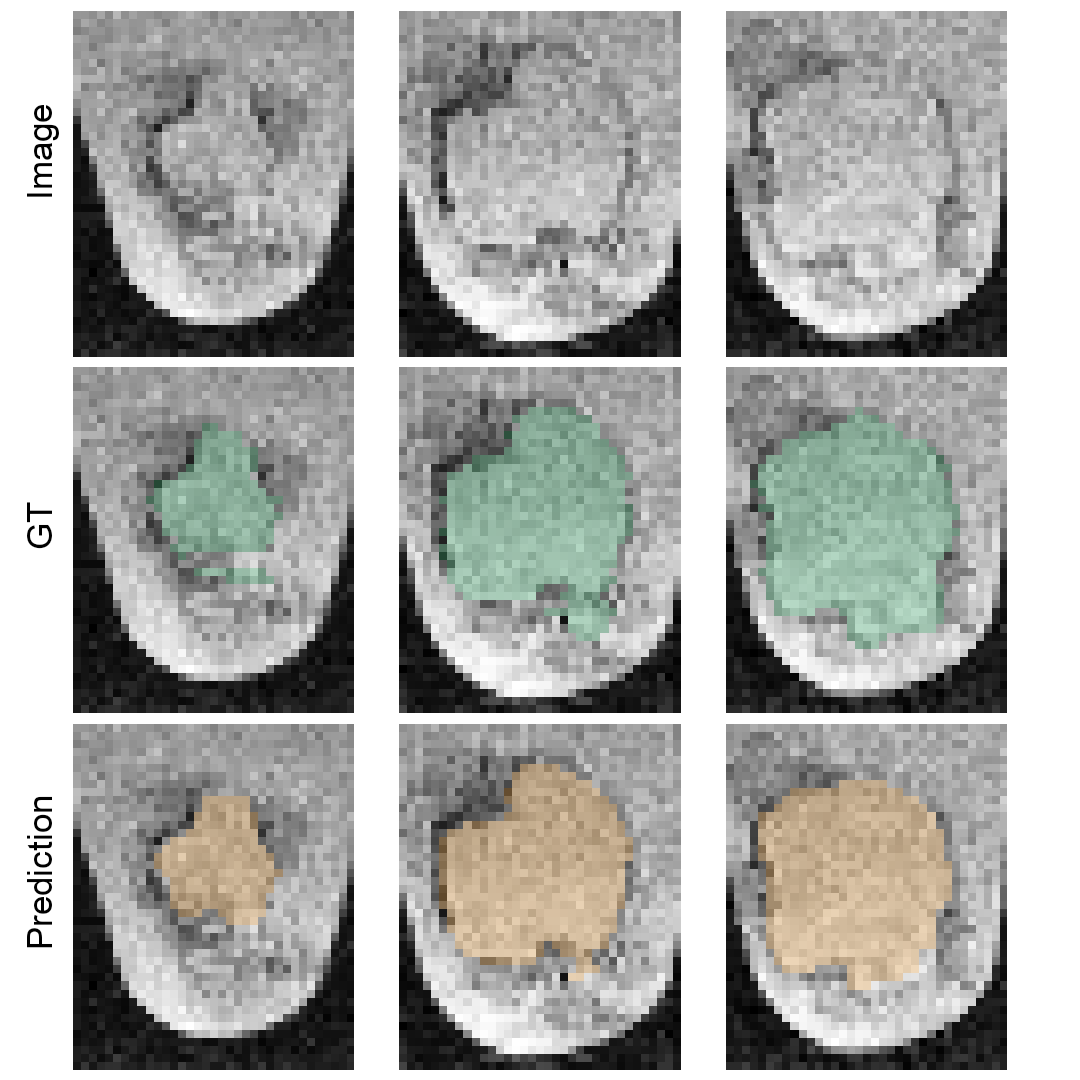

In [25]:
# strongest prediction
sov = SegmentationOverlayVisualizer(imgs,
                 org_id = 'org7_0530', 
                 org_loc=[22, 65, 20, 55], 
                 gt_dir = MRI_CYST_LOC_GT_DIR,
                 pred_dir = pred_dir_local_cysts,
                 planes='sagittal',
                 px_threshold=0,
                 keep_planes=[49, 56, 63],
                 rot_img=270,
                 pred_color='orange',
                 save_to='results/local_cyst_segmentation/plots/cyst_seg_overlay_org7_0530_pred-orange.png')
display(sov.plot_segmentation_overlays())

# Supplementary

### organoid segmentation

#### plot organoid growth over time

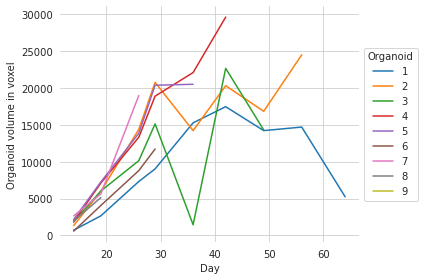

In [536]:
plot_organoid_growth_over_time()
plt.savefig('figures/organoid_growth_over_time.png', dpi=400)

### global cyst classification

#### correlation of compactness with cysticity from local cyst segmentations

/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/global_cyst_classification.py:43: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  np.stack(np.array(eppendorf_masks)), 0, -1)
/home/ws/oc9627/cerebral_organoid_quant_mri/scripts/utils/global_cyst_classification.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.stack(np.array(eppendorf_masks)), 0, -1)


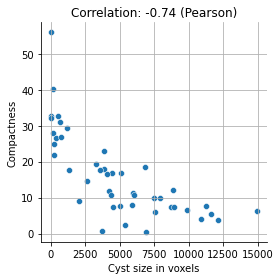

In [2]:
plot_correlation_compactness_cysticity(save_to='results/local_cyst_segmentation/plots/correlation_compactness_cysticity.png')

#### values for predicted organoid locations (3D U-Net)

/tmp/ipykernel_2668584/206784105.py:65: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  eppendorf_masks_stacked = np.moveaxis(np.stack(np.array(eppendorf_masks)), 0, -1)
/tmp/ipykernel_2668584/206784105.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  eppendorf_masks_stacked = np.moveaxis(np.stack(np.array(eppendorf_masks)), 0, -1)


ROC AUC for mean organoid intensity:	0.6485714285714286
ROC AUC for Compactness:		0.9514285714285714


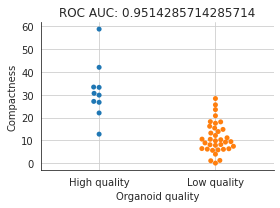

In [432]:
imgs = get_orig_imgs()
gt = get_organoid_locations(kind='predicted')
otsu, _ = get_all_otsu_masks(imgs, gt)

df = get_org_mean_and_compactness(imgs, 
                                  org_loc=gt, 
                                  otsu=otsu)
quality_annot = pd.read_csv('mri_paper_data/global_cyst_classification_annotations.csv')
df = df.merge(quality_annot)

roc_auc_moi = calculate_roc_auc(df, col='mean_organoid_intensity')
roc_auc_compactness = calculate_roc_auc(df, col='compactness')

print(f'ROC AUC for mean organoid intensity:\t{roc_auc_moi}')
print(f'ROC AUC for Compactness:\t\t{roc_auc_compactness}')

plot_compactness(df, roc_auc_compactness)

### ROC AUCs for DW-MRI

In [4]:
df_dwmri_metrics, _ = get_metrics_global_cyst_seg_dw_mri()
df_dwmri_metrics['ROC AUC'] = df_dwmri_metrics['ROC AUC'].map('{:,.2f}'.format)
df_dwmri_metrics['P-value'] = df_dwmri_metrics['P-value'].map('{:,.1E}'.format)
df_dwmri_metrics['P-value corr'] = df_dwmri_metrics['P-value corr'].map('{:,.1E}'.format)
df_dwmri_metrics
# df_dwmri_metrics.to_csv('metrics_global_cyst_seg_dwmri.csv', index=False, sep=';')

DW-MRI sequence ROC AUC  P-value P-value corr
1                   Trace    0.94  1.8E-08      3.8E-07
12         3rd Eigenvalue    0.93  3.0E-09      6.7E-08
11         2nd Eigenvalue    0.93  7.8E-08      1.4E-06
5    Tensor Component Dyy    0.92  4.4E-08      8.9E-07
6    Tensor Component Dzz    0.92  5.4E-08      1.0E-06
10         1st Eigenvalue    0.91  3.1E-06      5.0E-05
4    Tensor Component Dxx    0.89  2.1E-06      3.5E-05
18      2nd Eigenvector z    0.74  2.0E-03      3.0E-02
21      3rd Eigenvector z    0.68  1.8E-01      8.4E-01
3    Trace Weighted Image    0.67  5.7E-02      5.3E-01
20      3rd Eigenvector y    0.66  2.0E-01      8.4E-01
16      2nd Eigenvector x    0.65  8.8E-01      1.0E+00
2               Intensity    0.64  1.0E-01      7.3E-01
0   Fractional Anisotropy    0.63  5.2E-01      9.9E-01
17      2nd Eigenvector y    0.63  3.3E-02      3.8E-01
8    Tensor Component Dxz    0.62  1.7E-01      8.4E-01
19      3rd Eigenvector x    0.60  7.8E-01      1.0E+00
9    Tensor Component Dyz    0.54  8.2E-01      1.0E+00
14      1st Eigenvector y    0.53  9.2E-01      1.0E+00
15      1st Eigenvector z    0.52  8.5E-01      1.0E+00
13      1st Eigenvector x    0.51  8.1E-01      1.0E+00
7    Tensor Component Dxy    0.50  1.5E-01      8.3E-01

### show for one plane how automatic ET voxel determination works

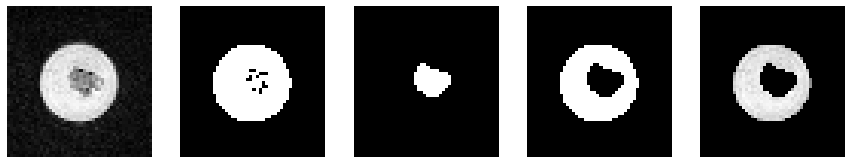

In [86]:
imgs = get_orig_imgs(kind='mri')
gts = get_masks(kind='gt_org_loc')

cor_plane = 60
img = imgs['org1_0518'][0:50, 10:58, cor_plane]
gt = gts['org1_0518'][0:50, 10:58, cor_plane]

cmap = plt.cm.get_cmap('Greys').reversed()
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
# otsu, _ = get_all_otsu_masks(imgs, gt)
axs[0].imshow(img, cmap=cmap)
otsu_seg = (img > threshold_otsu(img)).astype('bool')
axs[1].imshow(otsu_seg, cmap=cmap)
axs[2].imshow(gt, cmap=cmap)
# axs[1].imshow(img > threshold_otsu(img), cmap=cmap)
axs[3].imshow(np.where(otsu_seg & ~gt.astype('bool'), 1, 0), cmap=cmap)
axs[4].imshow(np.where(otsu_seg & ~gt.astype('bool'), img, 0), cmap=cmap)

axs[0].set_title
for i in range(5):
    axs[i].axis('off')